<a href="https://colab.research.google.com/github/Viny2030/UNED/blob/main/Monteverde02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/NLP/1_Introduccion/Introduccion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

1-

In [1]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 27.1 MB/s eta 0:00:00


2-

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

3-

In [3]:
import stanza

# Descarga el pipeline para el español
stanza.download('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


4-

In [4]:

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa una oración
doc = nlp("Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")

# Imprime el árbol de dependencias
print(doc.sentences[0].dependencies)




INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[({
  "id": 2,
  "text": "bought",
  "lemma": "buy",
  "upos": "VERB",
  "xpos": "VBD",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
  "head": 0,
  "deprel": "root",
  "start_char": 5,
  "end_char": 11
}, 'nsubj', {
  "id": 1,
  "text": "Jane",
  "lemma": "Jane",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 2,
  "deprel": "nsubj",
  "start_char": 0,
  "end_char": 4
}), ({
  "id": 0,
  "text": "ROOT"
}, 'root', {
  "id": 2,
  "text": "bought",
  "lemma": "buy",
  "upos": "VERB",
  "xpos": "VBD",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
  "head": 0,
  "deprel": "root",
  "start_char": 5,
  "end_char": 11
}), ({
  "id": 2,
  "text": "bought",
  "lemma": "buy",
  "upos": "VERB",
  "xpos": "VBD",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
  "head": 0,
  "deprel": "root",
  "start_char": 5,
  "end_char": 11
}, 'iobj', {
  "id": 3,
  "text": "me",
  "lemma": "I",
  "upos": "PRON",
  "xpos": "

5-

In [5]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa un texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre cada oración en el documento
for sentence in doc.sentences:
    # Extrae las dependencias
    dependencies = sentence.dependencies

    # Convert dependencies to a list of dictionaries before adding to results
    dependencies_list = []
    for dep in dependencies:
        dependencies_list.append({
            'governor': dep[0].text if dep[0] else None,
            'relation': dep[1],
            'dependent': dep[2].text if dep[2] else None
        })

    # Crea un diccionario para representar la oración
    sentence_data = {
        'text': sentence.text,
        'dependencies': dependencies_list  # Use the converted list here
    }

    # Agrega el diccionario a la lista de resultados
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_dependencies.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Dependencias de las oraciones guardadas en 'sentence_dependencies.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Dependencias de las oraciones guardadas en 'sentence_dependencies.json'


6-

In [6]:
# Itera sobre las palabras de la oración
for sent in doc.sentences:
    for word in sent.words:
        print(f"Word: {word.text}\tLemma: {word.lemma}\tUPOS: {word.upos}\tXPOS: {word.xpos}\tFeatures: {word.feats}")

Word: Jane	Lemma: Jane	UPOS: PROPN	XPOS: NNP	Features: Number=Sing
Word: bought	Lemma: buy	UPOS: VERB	XPOS: VBD	Features: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Word: me	Lemma: I	UPOS: PRON	XPOS: PRP	Features: Case=Acc|Number=Sing|Person=1|PronType=Prs
Word: these	Lemma: this	UPOS: DET	XPOS: DT	Features: Number=Plur|PronType=Dem
Word: books	Lemma: book	UPOS: NOUN	XPOS: NNS	Features: Number=Plur
Word: .	Lemma: .	UPOS: PUNCT	XPOS: .	Features: None
Word: Jane	Lemma: Jane	UPOS: PROPN	XPOS: NNP	Features: Number=Sing
Word: bought	Lemma: buy	UPOS: VERB	XPOS: VBD	Features: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Word: a	Lemma: a	UPOS: DET	XPOS: DT	Features: Definite=Ind|PronType=Art
Word: book	Lemma: book	UPOS: NOUN	XPOS: NN	Features: Number=Sing
Word: for	Lemma: for	UPOS: ADP	XPOS: IN	Features: None
Word: me	Lemma: I	UPOS: PRON	XPOS: PRP	Features: Case=Acc|Number=Sing|Person=1|PronType=Prs
Word: .	Lemma: .	UPOS: PUNCT	XPOS: .	Features: None
Word: She	Lemma: she	UP

7-

In [7]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa un texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre las oraciones y palabras
for sent in doc.sentences:
    sentence_data = {'text': sent.text, 'words': []}
    for word in sent.words:
        word_data = {
            'text': word.text,
            'lemma': word.lemma,
            'upos': word.upos,
            'xpos': word.xpos,
            'feats': word.feats
        }
        sentence_data['words'].append(word_data)
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_words.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Información de palabras guardada en 'sentence_words.json'")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Información de palabras guardada en 'sentence_words.json'


8-

In [8]:
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")
# Imprime los lemas
for sent in doc.sentences:
    for word in sent.words:
        print(f"Palabra: {word.text}\tLema: {word.lemma}")

Palabra: Jane	Lema: Jane
Palabra: bought	Lema: buy
Palabra: me	Lema: I
Palabra: these	Lema: this
Palabra: books	Lema: book
Palabra: .	Lema: .
Palabra: Jane	Lema: Jane
Palabra: bought	Lema: buy
Palabra: a	Lema: a
Palabra: book	Lema: book
Palabra: for	Lema: for
Palabra: me	Lema: I
Palabra: .	Lema: .
Palabra: She	Lema: she
Palabra: dropped	Lema: drop
Palabra: a	Lema: a
Palabra: line	Lema: line
Palabra: to	Lema: to
Palabra: him	Lema: he
Palabra: .	Lema: .
Palabra: Thank	Lema: thank
Palabra: you	Lema: you
Palabra: .	Lema: .
Palabra: She	Lema: she
Palabra: sleeps	Lema: sleep
Palabra: .	Lema: .
Palabra: I	Lema: I
Palabra: sleep	Lema: sleep
Palabra: a	Lema: a
Palabra: lot	Lema: lot
Palabra: .	Lema: .
Palabra: I	Lema: I
Palabra: was	Lema: be
Palabra: born	Lema: bear
Palabra: in	Lema: in
Palabra: Madrid	Lema: Madrid
Palabra: .	Lema: .
Palabra: the	Lema: the
Palabra: cat	Lema: cat
Palabra: was	Lema: be
Palabra: chased	Lema: chase
Palabra: by	Lema: by
Palabra: the	Lema: the
Palabra: dog	Lema: dog


9-

In [9]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('es')  # Cambia 'en' por 'es' para español

# Procesa un texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre las oraciones y palabras
for sent in doc.sentences:
    sentence_data = {'text': sent.text, 'lemmas': []}
    for word in sent.words:
        sentence_data['lemmas'].append(word.lemma)
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_lemmas_es.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Lemas de las palabras guardadas en 'sentence_lemmas_es.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | combined_charlm   |
| depparse     | combined_charlm   |
| sentiment    | tass2020_charlm   |
| ner          | conll02           |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Lemas de las palabras guardadas en 'sentence_lemmas_es.json'


10-

In [10]:
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")
# Imprime el árbol de dependencias
print(doc.sentences[0].dependencies)

[({
  "id": 0,
  "text": "ROOT"
}, 'root', {
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 0,
  "deprel": "root",
  "start_char": 0,
  "end_char": 4
}), ({
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 0,
  "deprel": "root",
  "start_char": 0,
  "end_char": 4
}, 'flat', {
  "id": 2,
  "text": "bought",
  "lemma": "bought",
  "upos": "PROPN",
  "head": 1,
  "deprel": "flat",
  "start_char": 5,
  "end_char": 11
}), ({
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 0,
  "deprel": "root",
  "start_char": 0,
  "end_char": 4
}, 'flat', {
  "id": 3,
  "text": "me",
  "lemma": "yo",
  "upos": "PRON",
  "feats": "Case=Acc|Number=Sing|Person=1|PrepCase=Npr|PronType=Prs",
  "head": 1,
  "deprel": "flat",
  "start_char": 12,
  "end_char": 14
}), ({
  "id": 1,
  "text": "Jane",
  "lemma": "jane",
  "upos": "PROPN",
  "xpos": "np00000",
  "head": 

11-

In [11]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa el texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre cada oración en el documento
for sentence in doc.sentences:
    # Extrae las dependencias
    dependencies = sentence.dependencies

    # Convert dependencies to a list of dictionaries before adding to results
    dependencies_list = []
    for dep in dependencies:
        dependencies_list.append({
            'governor': dep[0].text if dep[0] else None,
            'relation': dep[1],
            'dependent': dep[2].text if dep[2] else None
        })

    # Crea un diccionario para representar la oración
    sentence_data = {
        'text': sentence.text,
        'dependencies': dependencies_list  # Use the converted list here
    }

    # Agrega el diccionario a la lista de resultados
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_dependencies.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Dependencias de las oraciones guardadas en 'sentence_dependencies.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Dependencias de las oraciones guardadas en 'sentence_dependencies.json'


12-

In [12]:
# Procesa el texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")
# Imprime las etiquetas morfosintácticas
for sent in doc.sentences:
    for word in sent.words:
        print(f"Palabra: {word.text}\tEtiqueta: {word.upos}\tCaracterísticas: {word.feats}")

Palabra: Jane	Etiqueta: PROPN	Características: Number=Sing
Palabra: bought	Etiqueta: VERB	Características: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Palabra: me	Etiqueta: PRON	Características: Case=Acc|Number=Sing|Person=1|PronType=Prs
Palabra: these	Etiqueta: DET	Características: Number=Plur|PronType=Dem
Palabra: books	Etiqueta: NOUN	Características: Number=Plur
Palabra: .	Etiqueta: PUNCT	Características: None
Palabra: Jane	Etiqueta: PROPN	Características: Number=Sing
Palabra: bought	Etiqueta: VERB	Características: Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Palabra: a	Etiqueta: DET	Características: Definite=Ind|PronType=Art
Palabra: book	Etiqueta: NOUN	Características: Number=Sing
Palabra: for	Etiqueta: ADP	Características: None
Palabra: me	Etiqueta: PRON	Características: Case=Acc|Number=Sing|Person=1|PronType=Prs
Palabra: .	Etiqueta: PUNCT	Características: None
Palabra: She	Etiqueta: PRON	Características: Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs
Pa

13-

In [13]:
import stanza
import json

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa el texto
doc = nlp("""Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.""")

# Crea una lista para almacenar los resultados
results = []

# Itera sobre las oraciones y palabras
for sent in doc.sentences:
    sentence_data = {'text': sent.text, 'words': []}
    for word in sent.words:
        word_data = {
            'text': word.text,
            'upos': word.upos,
            'feats': word.feats
        }
        sentence_data['words'].append(word_data)
    results.append(sentence_data)

# Escribe los resultados en un archivo JSON
with open('sentence_words_pos.json', 'w') as f:
    json.dump(results, f, indent=4)

print("Etiquetas morfosintácticas guardadas en 'sentence_words_pos.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Etiquetas morfosintácticas guardadas en 'sentence_words_pos.json'


14-

In [14]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

15-

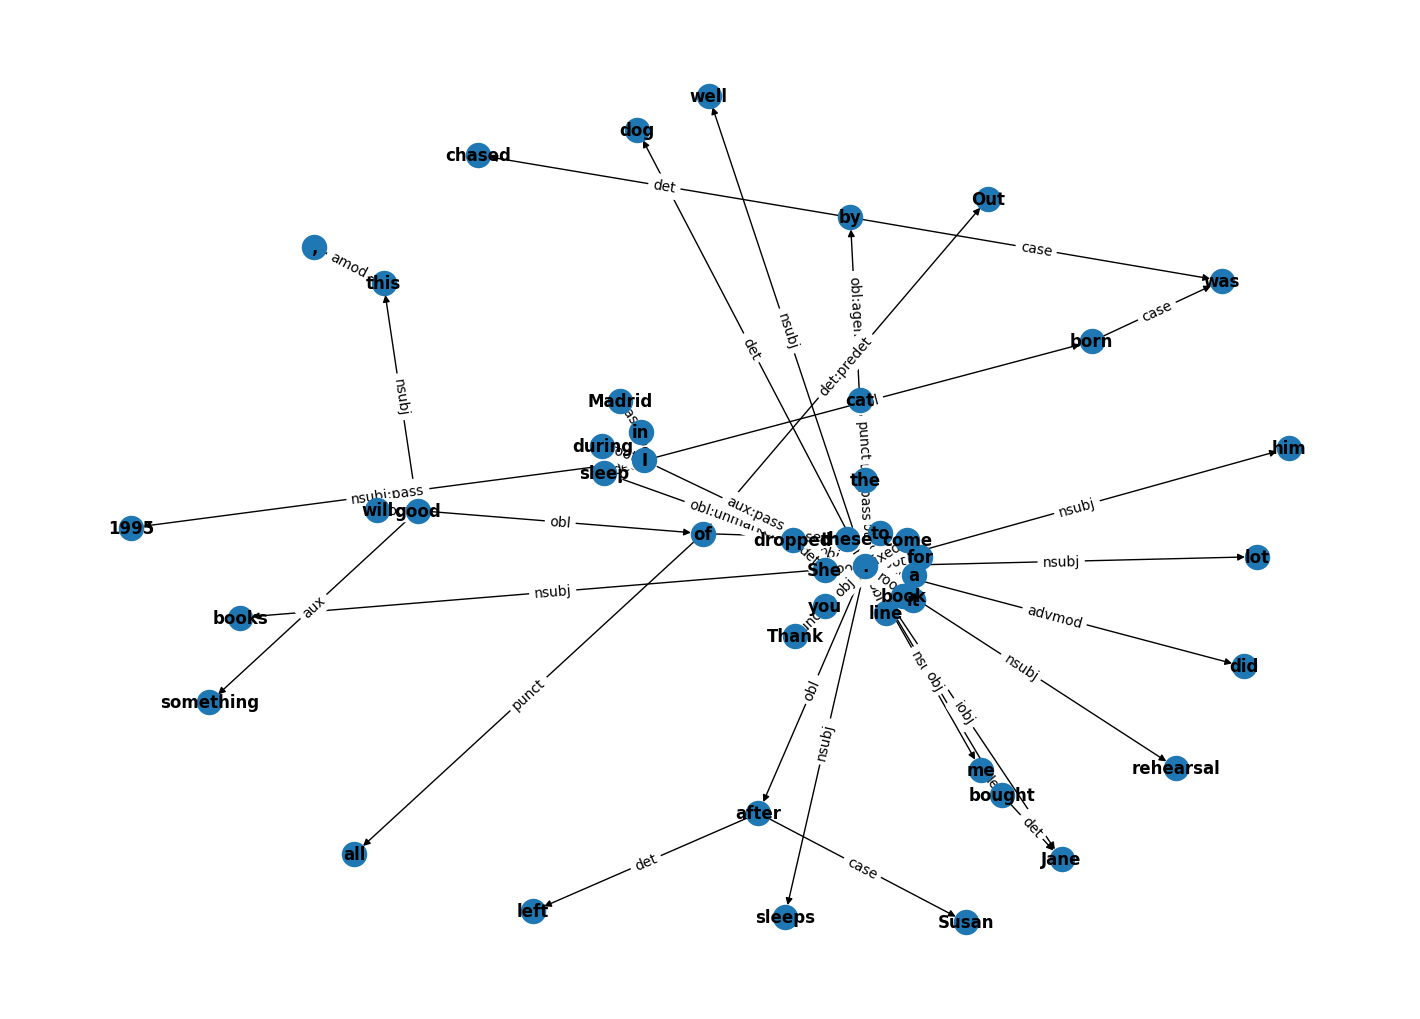

In [15]:
# Crea un grafo vacío
G = nx.DiGraph()

# Agrega los nodos (palabras) al grafo
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)
# Agrega las aristas (relaciones) al grafo
for sent in doc.sentences:
    for dep in sent.dependencies:
        # dep[0].id is the index of the governor (head) in the sentence, starting at 1
        # We need to subtract 1 to get the correct index in the list sent.words
        head = sent.words[dep[0].id - 3].text
        # Similar for the dependent word
        dep_word = sent.words[dep[2].id - 3].text
        rel = dep[1]  # dep[1] is the dependency type
        G.add_edge(head, dep_word, label=rel)


# Dibuja el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

17-

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


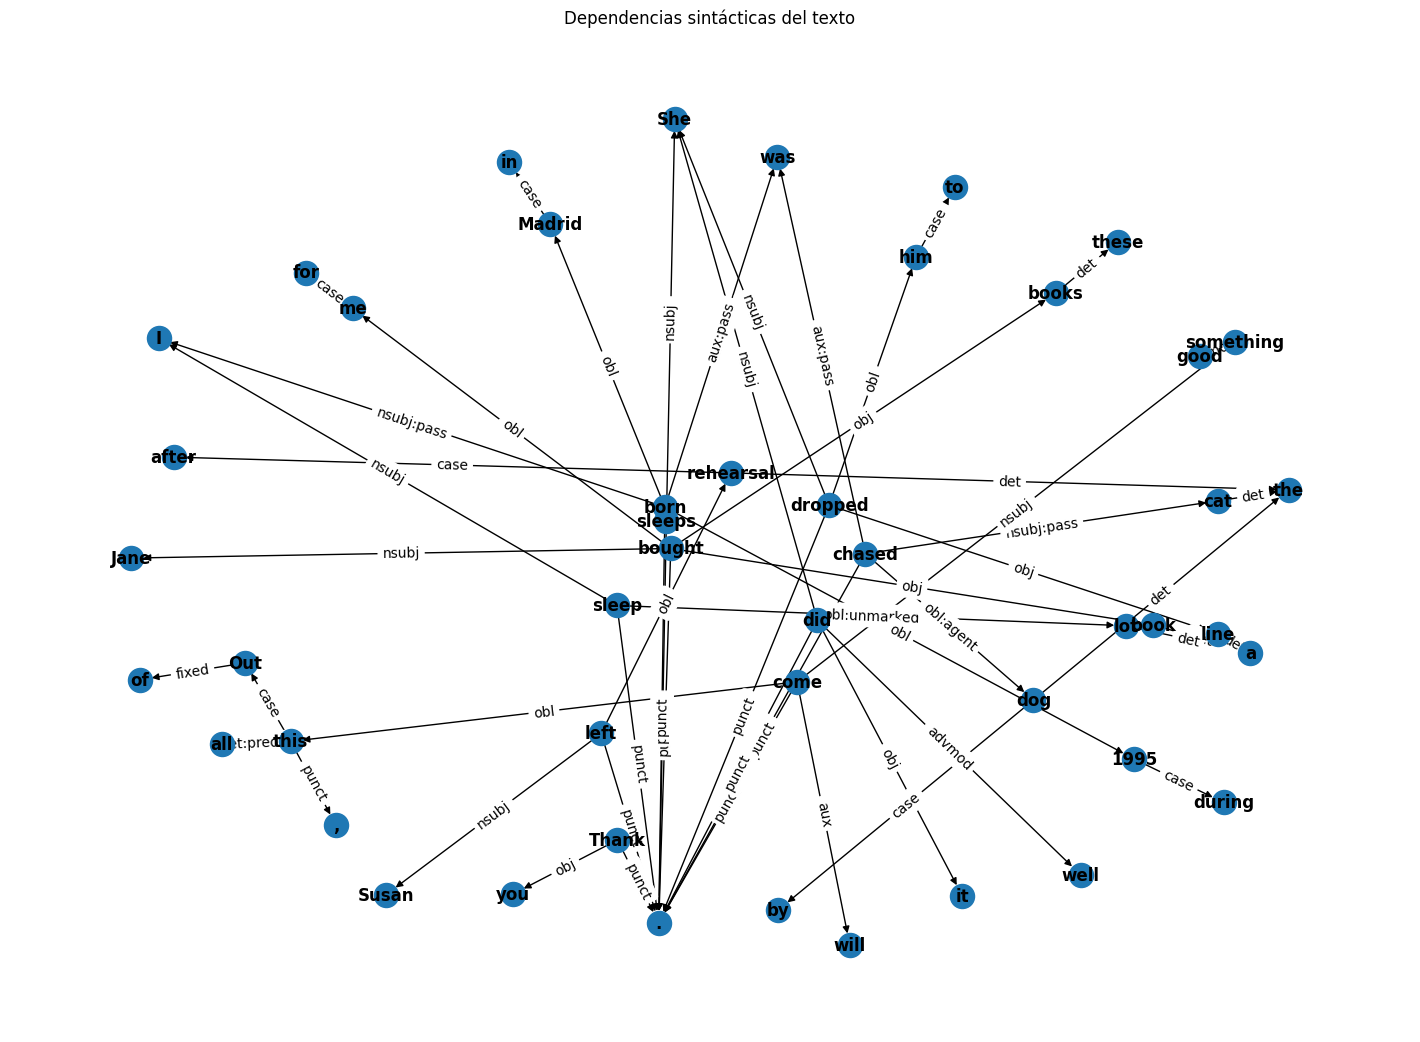

In [16]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

# Carga el pipeline
nlp = stanza.Pipeline('en')

# Procesa el texto
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""

doc = nlp(text)

# Crea un grafo dirigido vacío
G = nx.DiGraph()

# Agrega los nodos (palabras) al grafo
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)

# Agrega las aristas (relaciones) al grafo
for sent in doc.sentences:
    for dep in sent.dependencies:
        # Corrección de índice (resta 1 para alinear con el índice de lista)
        governor_index = dep[0].id - 1
        dependent_index = dep[2].id - 1

        # Verifica si los índices están dentro del rango de palabras de la oración
        if 0 <= governor_index < len(sent.words) and 0 <= dependent_index < len(sent.words):
            governor = sent.words[governor_index].text
            dependent = sent.words[dependent_index].text
            relation = dep[1]

            G.add_edge(governor, dependent, label=relation)

# Dibuja el grafo
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)  # Posicionamiento automático
nx.draw(G, pos, with_labels=True, font_weight='bold')  # Dibuja nodos y etiquetas

# Extrae etiquetas de aristas y dibuja
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Dibuja etiquetas de relación

plt.title("Dependencias sintácticas del texto")  # Titulo para el grafo
plt.show()

18-

In [17]:
import json
import networkx as nx
import stanza

# Load the pipeline and process the text
nlp = stanza.Pipeline('en')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Create the graph
G = nx.DiGraph()
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)
    for dep in sent.dependencies:
        governor_index = dep[0].id - 1
        dependent_index = dep[2].id - 1
        if 0 <= governor_index < len(sent.words) and 0 <= dependent_index < len(sent.words):
            governor = sent.words[governor_index].text
            dependent = sent.words[dependent_index].text
            relation = dep[1]
            # Add edge with label as an attribute
            G.add_edge(governor, dependent, label=relation)

# Prepare data for JSON
graph_data = {"nodes": [], "edges": []}
for node in G.nodes():
    graph_data["nodes"].append({"text": node})
for u, v, data in G.edges(data=True): # Iterate through edges with data
    graph_data["edges"].append({"source": u, "target": v, "label": data['label']}) # Access label from data

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


19-

In [18]:
# Write to JSON file
with open("dependency_graph.json", "w") as f:
    json.dump(graph_data, f, indent=4)  # Indent for readability

20-

<ipython-input-19-4e9155adccfe>:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


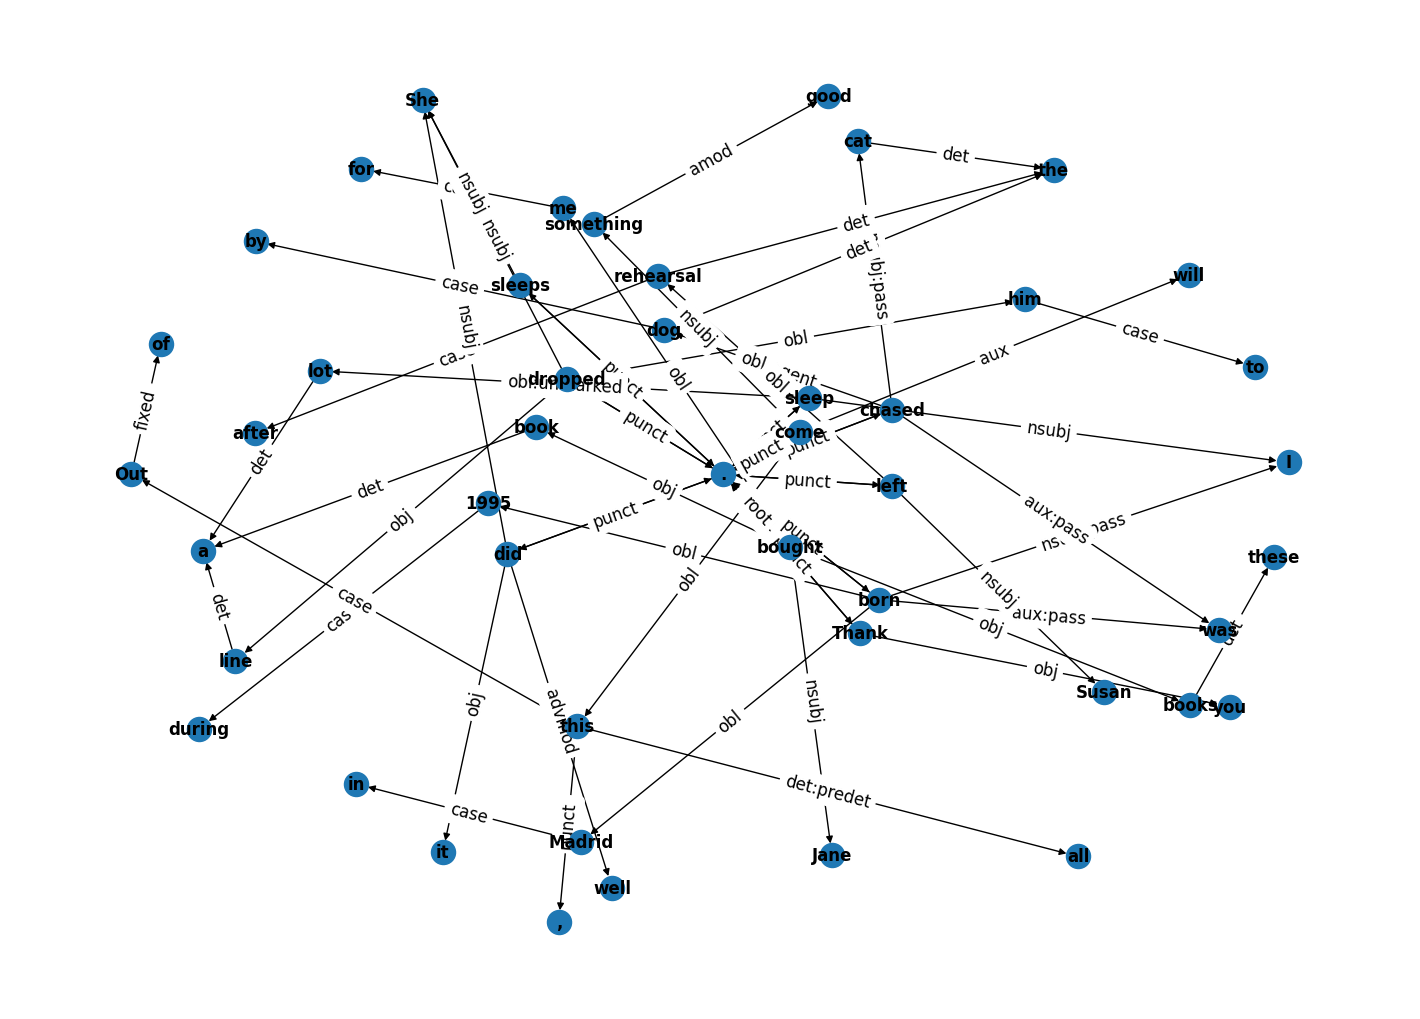

In [19]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (words) to the graph
for sent in doc.sentences:
    for word in sent.words:
        G.add_node(word.text)

# Add edges (relationships) to the graph, handling potential index errors
for sent in doc.sentences:
    for dep in sent.dependencies:
        try:
            head_index = dep[0].id - 1  # Get the head index (governor)
            dep_index = dep[2].id - 1  # Get the dependent word index
            head = sent.words[head_index].text
            dep_word = sent.words[dep_index].text
            rel = dep[1]  # Dependency type
            G.add_edge(head, dep_word, label=rel)
        except IndexError:
            print(f"Index error encountered for dependency: {dep}")
            # Handle index errors gracefully (e.g., log, skip dependency)

# Choose a layout for the graph (experiment with different layouts)
pos = nx.spring_layout(G, k=0.5)  # Adjust 'k' for node spacing

# Increase figure size for a larger plot
plt.figure(figsize=(14, 10))  # Adjust width and height as needed
# Draw the graph with labels and edge labels
nx.draw(G, pos, with_labels=True, font_weight='bold', font_family='sans-serif') # Changed 'fontfamily' to 'font_family'
nx.draw_networkx_edge_labels(G, pos, edge_labels=dict((k, v) for k, v in nx.get_edge_attributes(G, 'label').items()), font_size=12)

# Customize node and edge styles (optional)
# nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
# nx.set_edgecolor(G, 'gray')

# Show the plot
plt.axis('off')  # Hide axes for cleaner visualization
plt.tight_layout()
plt.show()

21-

In [20]:
import json
import networkx as nx
import stanza

# Load the pipeline and process the text (same as previous code)
nlp = stanza.Pipeline('en')
text = """..."""  # Your text here
doc = nlp(text)

# Create the graph (same as previous code)
G = nx.DiGraph()
# ... (code to create the graph)

# Prepare data for JSON
graph_data = {"nodes": [], "edges": []}
for node in G.nodes():
    graph_data["nodes"].append({"text": node})
for edge in G.edges():
    source, target, label = edge
    graph_data["edges"].append({"source": source, "target": target, "label": label})

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


22-

In [21]:
# Write to JSON file
with open("dependency_graph1.json", "w") as f:
    json.dump(graph_data, f, indent=4)  # Indent for readability

23-

In [22]:
!pip install textblob

24-

In [23]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob # Import TextBlob for sentiment analysis
nlp = stanza.Pipeline('en')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Perform sentiment analysis using TextBlob
text_content = " ".join([sentence.text for sentence in doc.sentences]) # Extract the text from the stanza Document
blob = TextBlob(text_content) # Create a TextBlob object
sentiment = blob.sentiment # Get the sentiment

print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}") # Access polarity and subjectivity


# Obtener las entidades nombradas (Named Entity Recognition using stanza)
for ent in doc.ents:
    print(ent.text, ent.type)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Polarity: 0.35, Subjectivity: 0.30000000000000004
Jane PERSON
Jane PERSON
Madrid GPE
Madrid GPE
1995 DATE
Susan PERSON


25-

In [24]:
import stanza
import json

# Load the pipeline
nlp = stanza.Pipeline('en')

# Process the text
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well."""
doc = nlp(text)

# Create a list to store sentence data
sentences = []

# Iterate through each sentence in the document
for sentence in doc.sentences:
    # Create a dictionary to store sentence information
    sentence_data = {
        "text": sentence.text,
        "words": []
    }

    # Iterate through each word in the sentence
    for word in sentence.words:
        word_data = {
            "text": word.text,
            "lemma": word.lemma,
            "upos": word.upos,
            "xpos": word.xpos,
            "feats": word.feats
        }
        sentence_data["words"].append(word_data)

    sentences.append(sentence_data)

# Write the sentence data to a JSON file
with open("sentence_data.json", "w") as f:
    json.dump(sentences, f, indent=4)

print("Sentence data written to sentence_data.json")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Sentence data written to sentence_data.json


26-

In [25]:
def analizar_proposiciones(sentence):
  sentence = "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps."

  proposiciones = []
  for sent in doc.sentences:
    # ... (your code to process sentences) ...
    # Define 'proposicion_normalizada' within the loop
    proposicion_normalizada = ""  # Replace "" with your normalization logic
    proposiciones.append(proposicion_normalizada)
  return proposiciones

# Example usage:
sentence = "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps."
proposiciones_result = analizar_proposiciones(sentence)  # Call the function
print(proposiciones_result)  # Print the result

['', '', '', '', '', '', '', '', '', '', '', '']


27-

In [26]:
import stanza

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
doc = nlp("Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps." )

# Accediendo a las dependencias de la palabra "cat"
for sentence in doc.sentences:
    for word in sentence.words:
        if word.text == "line":
            print(f"Word: {word.text}, Head: {sentence.words[word.head-1].text}, DepRel: {word.deprel}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Word: line, Head: dropped, DepRel: obj


28-

In [27]:
import stanza
import json

nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
text = """Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps."""
doc = nlp(text)

# Crear una lista para almacenar los resultados
dependencies = []

# Iterar sobre cada oración en el documento
for sentence in doc.sentences:
    sentence_deps = []
    for word in sentence.words:
        # Crear un diccionario para representar la dependencia de cada palabra
        word_dep = {
            "word": word.text,
            "head": sentence.words[word.head - 1].text if word.head > 0 else "ROOT",
            "deprel": word.deprel
        }
        sentence_deps.append(word_dep)
    dependencies.append(sentence_deps)

# Escribir los resultados en un archivo JSON
with open("sentence_dependencies.json", "w") as f:
    json.dump(dependencies, f, indent=4)

print("Dependencias de las oraciones guardadas en 'sentence_dependencies.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Dependencias de las oraciones guardadas en 'sentence_dependencies.json'


29-

In [28]:
import stanza

def extract_nvn_propositions(text):
  """
  Extracts subject-verb-object propositions from an English text.

  Args:
    text: The input text.

  Returns:
    A list of extracted NVN propositions.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp( "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps." )
  nvn_propositions = []

  for sentence in doc.sentences:
    for word in sentence.words:
      if word.deprel == 'nsubj':  # Check if the word is a nominal subject
        subject = word.text
        for line in sentence.words:
          if line.head == word.id and (line.deprel == 'obj' or line.deprel == 'dobj'):
            # Check if the current word is a child of the subject and has the correct dependency relation
            object = line.text
            for head in sentence.words:
              if head.head == 0:  # Find the root (main verb)
                verb = head.text
                nvn_propositions.append(f"{subject} {verb} {object}")
                break

  return nvn_propositions

# Example usage with the provided sentence
text = """
Jane bought me these books.
Jane bought a book for me.
She dropped a line to him.
Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal.
She did it well.
She sleeps during the morning, but she sleeps.
"""
propositions = extract_nvn_propositions(text)
print(propositions)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


[]


30-

In [29]:
import stanza
import json

def extract_nvn_propositions(text):
  """
  Extracts subject-verb-object propositions from an English text.

  Args:
      text: The input text.

  Returns:
      A list of dictionaries representing the extracted NVN propositions.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)

  propositions = []
  for sentence in doc.sentences:
    for word in sentence.words:
      if word.deprel == 'nsubj':  # Check if the word is a nominal subject
        subject = word.text
        for line in sentence.words:
          if line.head == word.id and (line.deprel == 'obj' or line.deprel == 'dobj'):
            # Check for subject's child with object dependency
            object = line.text
            for head in sentence.words:
              if head.head == 0:  # Find the root (main verb)
                verb = head.text
                proposition = {
                    "subject": subject,
                    "verb": verb,
                    "object": object
                }
                propositions.append(proposition)
                break  # Move on to the next sentence after finding a proposition

  return propositions

# Example usage with the provided sentence
text = """
Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps.
"""
propositions = extract_nvn_propositions(text)

# Write propositions to JSON file
with open("nvn_propositions.json", "w") as f:
  json.dump(propositions, f, indent=4)

print("NVN propositions written to 'nvn_propositions.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


NVN propositions written to 'nvn_propositions.json'


31-

In [30]:
import stanza

def extract_nv_propositions(text):
    """
    Extrae proposiciones sujeto-verbo de un texto en inglés.

    Args:
        text: El texto de entrada.

    Returns:
        Una lista de proposiciones NV.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp( "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")
    nv_propositions = []

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.deprel == 'nsubj':  # Verificamos si la palabra es un sujeto nominal
                subject = word.text
                for head in sentence.words:
                    if head.head == 0:  # Encontramos el verbo principal
                        verb = head.text
                        nv_propositions.append(f"{subject} {verb}")
                        break

    return nv_propositions

# Ejemplo de uso
text = ( "Jane bought me these books.\nJane bought a book for me.\nShe dropped a line to him. Thank you.\nShe sleeps.\nI sleep a lot.\nI was born in Madrid.\nthe cat was chased by the dog.\nI was born in Madrid during 1995.\nOut of all this , something good will come.\nSusan left after the rehearsal. She did it well.\nShe sleeps during the morning, but she sleeps.")
propositions = extract_nv_propositions(text)
print(propositions)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


['Jane bought', 'Jane bought', 'She dropped', 'She sleeps', 'I sleep', 'something come', 'Susan left', 'She did', 'She sleeps', 'she sleeps']


32-

In [31]:
import stanza
import json

def extract_nv_propositions(text):
  """
  Extrae proposiciones sujeto-verbo de un texto en inglés.

  Args:
      text: El texto de entrada.

  Returns:
      Una lista de diccionarios con las proposiciones NV.
  """

  nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
  doc = nlp(text)
  nv_propositions = []

  for sentence in doc.sentences:
    for word in sentence.words:
      if word.deprel == 'nsubj':  # Verificamos si la palabra es un sujeto nominal
        subject = word.text
        for head in sentence.words:
          if head.head == 0:  # Encontramos el verbo principal
            verb = head.text
            nv_propositions.append({"subject": subject, "verb": verb})
            break

  return nv_propositions

# Ejemplo de uso
text = """
Jane bought me these books.
Jane bought a book for me.
She dropped a line to him. Thank you.
She sleeps.
I sleep a lot.
I was born in Madrid.
the cat was chased by the dog.
I was born in Madrid during 1995.
Out of all this , something good will come.
Susan left after the rehearsal. She did it well.
She sleeps during the morning, but she sleeps.
"""
propositions = extract_nv_propositions(text)

# Escribir las proposiciones en un archivo JSON
with open("nv_propositions.json", "w") as f:
    json.dump(propositions, f, indent=4)

print("Proposiciones NV escritas en 'nv_propositions.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


Proposiciones NV escritas en 'nv_propositions.json'


33-

In [32]:
!pip install stanza

34-

In [33]:
import stanza
import requests
from bs4 import BeautifulSoup
import json
import nltk
from nltk.corpus import stopwords

def download_and_clean_gutenberg_book(book_id):
    """Descargamos un libro de Proyecto Gutenberg y lo limpiamos de manera más sofisticada."""
    url = f"https://www.gutenberg.org/files/{book_id}/{book_id}-0.txt"
    response = requests.get(url)
    response.encoding = 'utf-8'  # Set encoding to handle potential issues

    if response.status_code == 200:
        text = response.text

        # Dividimos el texto en líneas
        lines = text.splitlines()

        # Identificamos la sección del cuerpo del libro (ejemplo simplificado)
        start_index = 0
        end_index = len(lines) - 1
        for i, line in enumerate(lines):
            if "*** START OF THIS PROJECT GUTENBERG EBOOK" in line.upper():  # Case-insensitive match
                start_index = i + 1
            if "*** END OF THIS PROJECT GUTENBERG EBOOK" in line.upper():  # Case-insensitive match
                end_index = i - 1
                break

        # Extraemos la sección del cuerpo

        return "\n".join(lines[start_index:end_index+1])

35-

In [34]:
import stanza
import re

def download_and_clean_gutenberg_book(book_id):
    """
    Descargamos un libro de Proyecto Gutenberg y lo limpiamos
    de encabezados, pies de página y comentarios.

    Args:
        book_id: El ID del libro en Proyecto Gutenberg.

    Returns:
        El texto del libro limpio.
    """
    url = f"https://www.gutenberg.org/files/{book_id}/{book_id}-0.txt"
    response = requests.get(url)
    text = response.text

    # Identificar y eliminar secciones no deseadas
    start_index = text.find("*** START OF THIS PROJECT GUTENBERG EBOOK ***")
    end_index = text.find("*** END OF THIS PROJECT GUTENBERG EBOOK ***")

    if start_index != -1 and end_index != -1:
        cleaned_text = text[start_index:end_index]
    else:
        cleaned_text = text

    # Eliminar líneas en blanco y espacios iniciales/finales
    cleaned_text = "\n".join([line.strip() for line in cleaned_text.splitlines() if line.strip()])

    # Eliminar líneas con comentarios (ejemplo: líneas que comienzan con "*")
    cleaned_text = "\n".join([line for line in cleaned_text.splitlines() if not line.startswith("*")])

    return cleaned_text

# Ejemplo de extracción de información:
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
cleaned_text = download_and_clean_gutenberg_book(book_id)  # Replace book_id with desired value
doc = nlp(cleaned_text)

for sent in doc.sentences:  # Iterate over sentences in the document
    for word in sent.words:
        print(f"{word.text}\t{word.upos}\t{word.lemma}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


NameError: name 'book_id' is not defined

36-

In [ ]:
def process_with_stanza(text):
    """
    Procesa un texto utilizando Stanza y extrae información.

    Args:
        text: El texto a procesar.

    Returns:
        Un diccionario con la información procesada.
    """

    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)

    sentences = []
    for sent in doc.sentences:
        sentence_data = {
            "text": sent.text,
            "words": []
        }
        for word in sent.words:
            word_data = {
                "text": word.text,
                "pos": word.upos,
                "lemma": word.lemma,
                "head": word.head,
                "deprel": word.deprel
            }
            sentence_data["words"].append(word_data)
        sentences.append(sentence_data)

    return sentences

# Ejemplo de uso:
book_id = 1342  # Moby Dick
text = download_and_clean_gutenberg_book(book_id)
sentence_data = process_with_stanza(text)

# Guardar los resultados en un archivo JSON
with open("sentence_data.json", "w") as f:
    json.dump(sentence_data, f, indent=4)

37-

In [35]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

38-

In [36]:
import stanza
from collections import Counter
import json

def download_and_clean_gutenberg_book(book_id):
    """Descargamos un libro de Proyecto Gutenberg y lo limpiamos de manera más sofisticada."""
    url = f"https://www.gutenberg.org/files/{book_id}/{book_id}-0.txt"
    response = requests.get(url)
    text = response.text

    # Dividimos el texto en líneas
    lines = text.splitlines()

    # Identificamos la sección del cuerpo del libro (ejemplo simplificado)
    start_index = 0
    end_index = len(lines) - 1
    for i, line in enumerate(lines):
        if "Start of this project Gutenberg etext" in line:
            start_index = i + 1
        if "End of this project Gutenberg etext" in line:
            end_index = i - 1

    # Extraemos la sección del cuerpo
    cleaned_text = "\n".join(lines[start_index:end_index+1])

    return cleaned_text

def count_word_frequencies(text):
    """Cuenta las frecuencias de las palabras en un texto.

    Args:
        text: El texto a analizar.

    Returns:
        Un diccionario donde las claves son las palabras y los valores son sus frecuencias.
    """

    nlp = stanza.Pipeline('en', processors='tokenize')
    doc = nlp(text)

    words = [word.text.lower() for sent in doc.sentences for word in sent.words]
    word_counts = Counter(words)

    return word_counts

# Ejemplo de uso
book_id = 1342  # Moby Dick
text = download_and_clean_gutenberg_book(book_id)

word_counts = count_word_frequencies(text=text)

# Obtener las palabras más comunes
most_common = word_counts.most_common(10)

# Obtener las palabras menos comunes (excluyendo stop words)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
less_common = [(word, count) for word, count in word_counts.items() if word not in stop_words]
less_common.sort(key=lambda x: x[1])

# Crear un diccionario para almacenar los resultados
word_frequency_data = {
    "most_common": most_common,
    "least_common": less_common[:10]
}

# Escribir los resultados en un archivo JSON
with open("word_frequencies_book.json", "w") as f:
    json.dump(word_frequency_data, f, indent=4)

print("Frecuencias de palabras escritas en 'word_frequencies_book.json'")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Done loading processors!


Frecuencias de palabras escritas en 'word_frequencies_book.json'


39-

In [37]:
len(text)

728841

40-

In [38]:
print(text)

*** START OF THE PROJECT GUTENBERG EBOOK 1342 ***
                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




                                PRIDE.
                                  and
                               PREJUDICE

                                  by
                             Jane Austen,

                           with a Preface by
                           George Saintsbury
                                  and
                           Illustrations by
                             Hugh Thomson

                         [Illustration: 1894]

                       Ruskin       156. Charing
   

41-

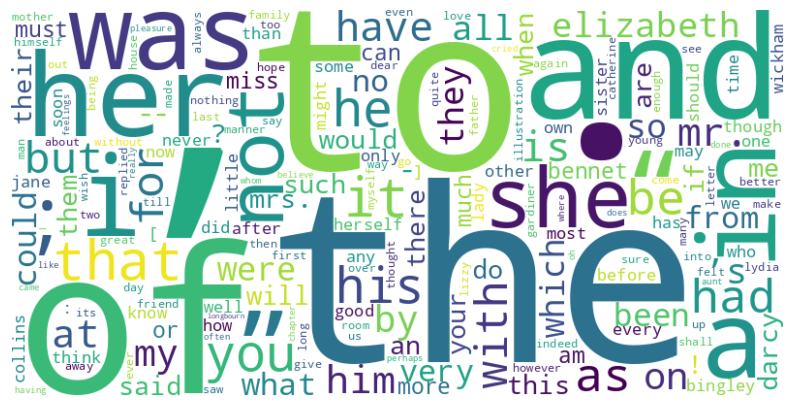

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Convertir el word_counts (Counter) a un DataFrame de Pandas
df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frecuencia'])

# 1. Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


42-

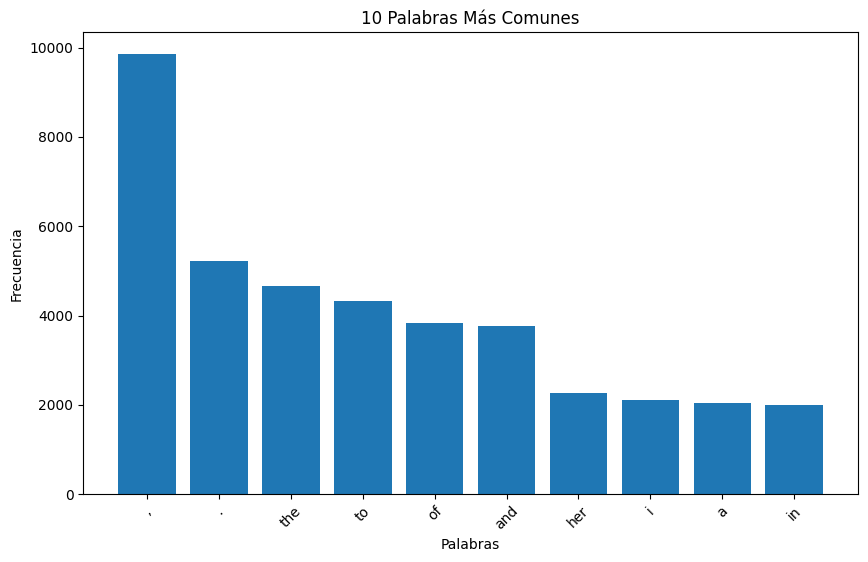

In [40]:
top_10 = df.sort_values(by='frecuencia', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['frecuencia'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('10 Palabras Más Comunes')
plt.xticks(rotation=45)
plt.show()


43-

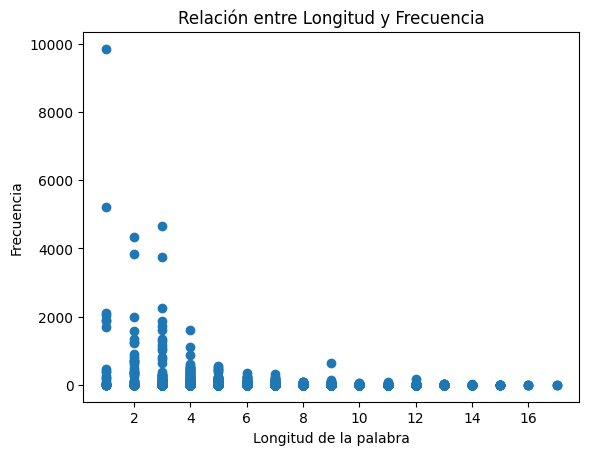

In [41]:
# 3. Gráfico de dispersión (opcional, si tienes datos de otra variable)
# Supongamos que tienes una columna adicional en el DataFrame con la longitud de cada palabra
df['longitud'] = df.index.map(len)
plt.scatter(df['longitud'], df['frecuencia'])
plt.xlabel('Longitud de la palabra')
plt.ylabel('Frecuencia')
plt.title('Relación entre Longitud y Frecuencia')
plt.show()

44-

In [42]:
import stanza
import requests
from bs4 import BeautifulSoup
import json
import nltk
from nltk.corpus import stopwords

def download_and_clean_gutenberg_book(book_id):
    """Descargamos un libro de Proyecto Gutenberg y lo limpiamos de manera más sofisticada."""
    url = f"https://www.gutenberg.org/files/{book_id}/{book_id}-0.txt"
    response = requests.get(url)
    response.encoding = 'utf-8'  # Set encoding to handle potential issues

    if response.status_code == 200:
        text = response.text

        # Dividimos el texto en líneas
        lines = text.splitlines()

        # Identificamos la sección del cuerpo del libro (ejemplo simplificado)
        start_index = 0
        end_index = len(lines) - 1
        for i, line in enumerate(lines):
            if "*** START OF THIS PROJECT GUTENBERG EBOOK" in line.upper():  # Case-insensitive match
                start_index = i + 1
            if "*** END OF THIS PROJECT GUTENBERG EBOOK" in line.upper():  # Case-insensitive match
                end_index = i - 1
                break

        # Extraemos la sección del cuerpo
        cleaned_text = "\n".join(lines[start_index:end_index+1])

        return cleaned_text
    else:
        print(f"Error al descargar el libro {book_id}: {response.status_code}")
        return None  # or raise an exception


def process_with_stanza(cleaned_text, book_title="Moby Dick"):
    """
    Procesa un texto utilizando Stanza, realizando stemming y lematización, y generando un DataFrame con las palabras y sus frecuencias.

    Args:
        text: El texto a procesar.
        book_title: El título del libro (opcional, para personalizar los resultados).

    Returns:
        Un DataFrame de Pandas con las palabras, sus lemas, y sus frecuencias.
    """

    # Descargar los datos necesarios de NLTK
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('stopwords')

    # Crear un pipeline de Stanza
    nlp = stanza.Pipeline('en', processors='tokenize,lemma')

    # Procesar el texto
    doc = nlp(cleaned_text)

    # Obtener las palabras, lemas y frecuencias
    words = []
    lemmas = []
    for sent in doc.sentences:
        for word in sent.words:
            words.append(word.text)
            lemmas.append(word.lemma)

    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word, lemma in zip(words, lemmas) if word not in stop_words]
    filtered_lemmas = [lemma for lemma in lemmas if lemma not in stop_words]

    # Contar las frecuencias de los lemas
    from collections import Counter
    lemma_counts = Counter(filtered_lemmas)

    # Crear un DataFrame de Pandas
    import pandas as pd
    df = pd.DataFrame.from_dict(lemma_counts, orient='index', columns=['frecuencia'])
    df.index.name = 'lema'
    df = df.sort_values(by='frecuencia', ascending=False)

    print(f"Análisis de frecuencia de palabras para {book_title}")  # This line was improperly indented
    return df


45-

In [46]:
import json

import nltk
from nltk.corpus import stopwords

def process_with_stanza(cleaned_text, book_title="Moby Dick"):
    """
    Procesa un texto utilizando Stanza, realizando stemming y lematización, y generando un DataFrame con las palabras y sus frecuencias.

    Args:
        text: El texto a procesar.
        book_title: El título del libro (opcional, para personalizar los resultados).

    Returns:
        Un DataFrame de Pandas con las palabras, sus lemas, y sus frecuencias.
    """

    # Descargar los datos necesarios de NLTK
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('stopwords')

    # Crear un pipeline de Stanza
    nlp = stanza.Pipeline('en', processors='tokenize,lemma')

    # Procesar el texto
    doc = nlp(cleaned_text)

    # Obtener las palabras, lemas y frecuencias
    words = []
    lemmas = []
    for sent in doc.sentences:
        for word in sent.words:
            words.append(word.text)
            lemmas.append(word.lemma)

    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word, lemma in zip(words, lemmas) if word not in stop_words]
    filtered_lemmas = [lemma for lemma in lemmas if lemma not in stop_words]

    # Contar las frecuencias de los lemas
    from collections import Counter
    lemma_counts = Counter(filtered_lemmas)

    # Crear un DataFrame de Pandas
    import pandas as pd
    df = pd.DataFrame.from_dict(lemma_counts, orient='index', columns=['frecuencia'])
    df.index.name = 'lema'
    df = df.sort_values(by='frecuencia', ascending=False)

    print(f"Análisis de frecuencia de palabras para {book_title}") #This line was improperly indented
    return df

# Ejemplo de uso:
book_id = 1342  # Moby Dick
text = download_and_clean_gutenberg_book(book_id)# Asumiendo que tienes una función para descargar libros de Gutenberg
df_moby_dick = process_with_stanza(text)
print(df_moby_dick.head(10))

# Convertir el DataFrame a un diccionario
df_moby_dick = df.to_dict('records')

# Escribir el diccionario a un archivo JSON
with open('moby_dick_word_freq.json', 'w') as outfile:
    json.dump(df_moby_dick, outfile, indent=4)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


Análisis de frecuencia de palabras para Moby Dick
           frecuencia
lema                 
,                9850
.                5217
''               3794
I                2540
;                1700
Mr.               807
's                730
Elizabeth         645
say               616
could             530


46-

In [49]:
import stanza

def process_with_stanza(cleaned_text, book_title="Moby Dick"):
    """
    Procesa un texto utilizando Stanza, realizando NER y generando un DataFrame con las entidades encontradas.

    Args:
        text: El texto a procesar.
        book_title: El título del libro (opcional, para personalizar los resultados).

    Returns:
        Un DataFrame de Pandas con las entidades encontradas, sus tipos y sus spans.
    """

    # Crear un pipeline de Stanza con el procesador NER
    nlp = stanza.Pipeline('en', processors='tokenize,ner')

    # Procesar el texto
    doc = nlp(cleaned_text)

    # Extraer las entidades
    entities = []
    for sent in doc.sentences:
        for ent in sent.ents:
            entities.append((ent.text, ent.type))

    # Crear un DataFrame de Pandas
    import pandas as pd
    df = pd.DataFrame(entities, columns=['entities', 'tipe'])
    return df

# Ejemplo de uso:
book_id = 1342  # Moby Dick
text = download_and_clean_gutenberg_book(book_id)
df_entities = process_with_stanza(text)
print(df_entities.head())

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


       entities      tipe
0  GEORGE ALLEN    PERSON
1           156  CARDINAL
2        LONDON       GPE
3  RUSKIN HOUSE       ORG
4   Jane Austen    PERSON


47-

In [51]:
import stanza

def process_with_stanza(text, book_title="Moby Dick"):
    """
    Procesa un texto utilizando Stanza, realizando NER y análisis de sentimientos.

    Args:
        text: El texto a procesar.
        book_title: El título del libro (opcional, para personalizar los resultados).

    Returns:
        Un diccionario con las entidades encontradas, el sentimiento general y posiblemente otras estadísticas.
    """

    # Crear un pipeline de Stanza con los procesadores NER y sentimiento
    nlp = stanza.Pipeline('en', processors='tokenize,ner,sentiment')

    # Procesar el texto
    doc = nlp(text)

    # Extraer las entidades y el sentimiento
    entities = []
    sentiments = []
    for sent in doc.sentences:
        entities.extend([(ent.text, ent.type) for ent in sent.ents])
        sentiments.append(sent.sentiment)

    # Calcular el sentimiento promedio
    average_sentiment = sum(sentiments) / len(sentiments)

    # Crear un diccionario con los resultados
    results = {
        'entities': entities,
        'average_sentiment': average_sentiment
    }
    return results

# Ejemplo de uso:
book_id = 1342  # Moby Dick
text = download_and_clean_gutenberg_book(book_id)
analysis = process_with_stanza(text)
print(analysis)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| sentiment | sstplus_charlm            |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


{'entities': [('GEORGE ALLEN', 'PERSON'), ('156', 'CARDINAL'), ('LONDON', 'GPE'), ('RUSKIN HOUSE', 'ORG'), ('Jane Austen', 'PERSON'), ('George Saintsbury', 'PERSON'), ('Hugh Thomson', 'PERSON'), ('1894', 'DATE'), ('156', 'CARDINAL'), ('Charing\n                       House', 'FAC'), ('Cross Road', 'FAC'), ('London', 'GPE'), ('George Allen', 'PERSON'), ('CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.\n                  TOOKS COURT', 'ORG'), ('CHANCERY LANE', 'GPE'), ('LONDON', 'GPE'), ('J. Comyns Carr', 'PERSON'), ('Hugh Thomson_', 'PERSON'), ('Walt Whitman', 'PERSON'), ('Austenians', 'NORP'), ('Janites', 'NORP'), ('one', 'CARDINAL'), ('Northanger\nAbbey', 'PERSON'), ('first', 'ORDINAL'), ('Mansfield Park', 'FAC'), ('Edmund', 'PERSON'), ('Fanny', 'PERSON'), ('Mary', 'PERSON'), ('Fanny', 'PERSON'), ('Crawford', 'PERSON'), ('Norris', 'PERSON'), ('Emma', 'PERSON'), ('Austen', 'PERSON'), ('Emma', 'PERSON'), ('Bates', 'PERSON'), ('Eltons', 'PERSON'), ('first', 'ORDINAL'), ('first', 'ORDINAL'),

48-

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


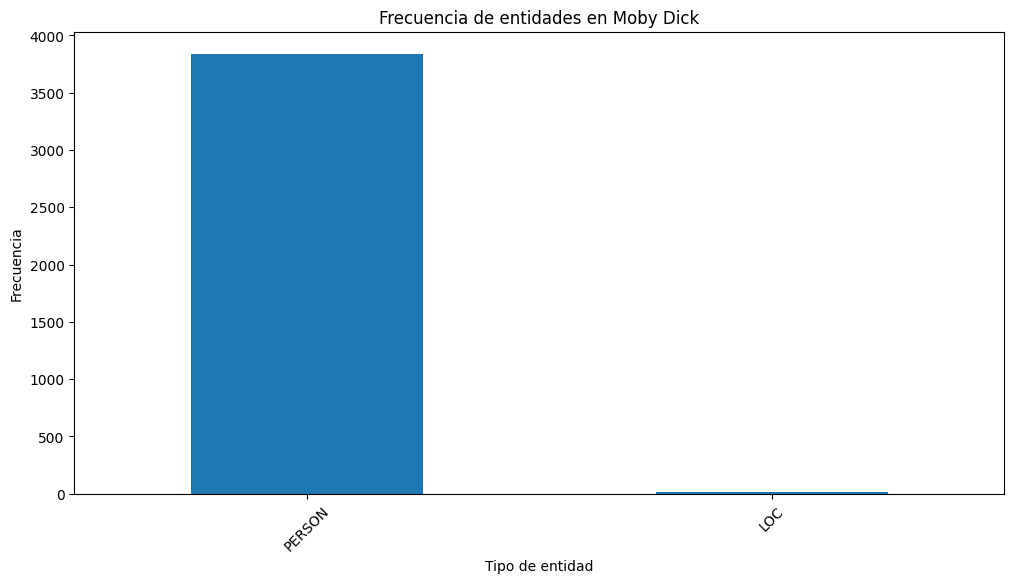

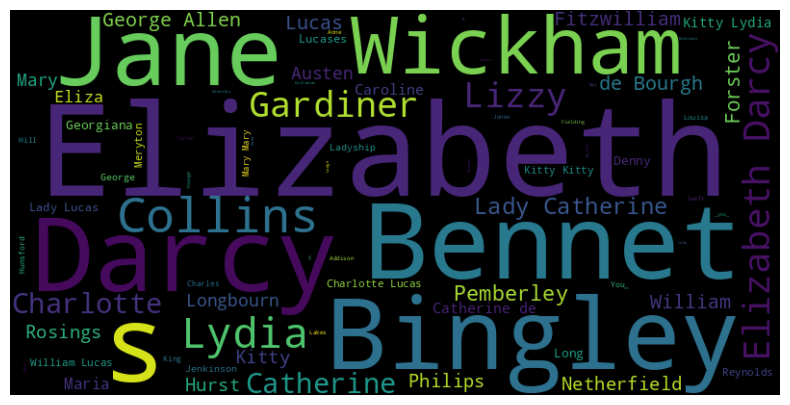

In [52]:
import stanza
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def process_with_stanza(cleaned_text, book_title="Moby Dick", entity_types=None):
    """
    Procesa un texto utilizando Stanza, realizando NER y generando un DataFrame con las entidades encontradas.

    Args:
        cleaned_text: El texto a procesar.
        book_title: El título del libro (opcional, para personalizar los resultados).
        entity_types: Una lista de tipos de entidades a filtrar (opcional).

    Returns:
        Un DataFrame de Pandas con las entidades encontradas, sus tipos y sus spans.
    """

    # Crear un pipeline de Stanza con el procesador NER
    nlp = stanza.Pipeline('en', processors='tokenize,ner')

    # Procesar el texto
    doc = nlp(cleaned_text)

    # Extraer las entidades
    entities = []
    for sent in doc.sentences:
        for ent in sent.ents:
            if entity_types is None or ent.type in entity_types:
                entities.append((ent.text, ent.type))

    # Crear un DataFrame de Pandas
    df = pd.DataFrame(entities, columns=['entity', 'type'])

    # Visualización
    def plot_entity_frequency(df):
        plt.figure(figsize=(12, 6))
        df['type'].value_counts().plot(kind='bar')
        plt.title(f"Frecuencia de entidades en {book_title}")
        plt.xlabel('Tipo de entidad')
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()

    def generate_entity_wordcloud(df):
        text = ' '.join(df['entity'])
        wordcloud = WordCloud(width=800, height=400).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

    plot_entity_frequency(df)
    generate_entity_wordcloud(df)

    return df

# Ejemplo de uso:
book_id = 1342
text = download_and_clean_gutenberg_book(book_id)
df_entities = process_with_stanza(text, entity_types=['PERSON', 'LOC'])

49-

In [ ]:
!pip install stanza

import stanza
import networkx as nx
import matplotlib.pyplot as plt

def download_gutenberg_book(book_id):
    """
    Descargamos un libro de Proyecto Gutenberg y lo limpiamos.

    Args:
        book_id: El ID del libro en Proyecto Gutenberg.

    Returns:
        El texto del libro sin la cabecera y la licencia.
    """
    url = f"https://www.gutenberg.org/files/{book_id}/{book_id}-0.txt"
    response = requests.get(url)
    text = response.text

    # Eliminamos las primeras líneas (típicamente cabecera y licencia)
    lines = text.splitlines()
    while lines[0].startswith("*"):
        lines.pop(0)
    text = "\n".join(lines)

    return text

def process_with_stanza(text, book_title="Moby Dick"):
    """
    Procesa un texto utilizando Stanza, extrae relaciones de dependencia y crea un grafo.

    Args:
        text: El texto a procesar.
        book_title: El título del libro (opcional, para personalizar los resultados).

    Returns:
        Un objeto de grafo de NetworkX que representa las relaciones de dependencia.
    """

    # Crear un pipeline de Stanza con el procesador de análisis de dependencias
    nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')
    doc = nlp(text)

    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos y aristas al grafo
    for sentence in doc.sentences:
        for word in sentence.words:
            G.add_node(word.text, pos=word.upos, lemma=word.lemma)
            if word.head != 0:  # Si la palabra tiene una cabeza
                head_word = sentence.words[word.head - 1].text
                G.add_edge(head_word, word.text, label=word.deprel)

    return G

# Ejemplo de uso:
book_id = 1342  # Moby Dick
text = download_and_clean_gutenberg_book(book_id)
graph = process_with_stanza(text)

# Visualizar el grafo (puede tomar tiempo para grafos grandes)
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(graph, k=0.15)  # Algoritmo de posicionamiento de nodos (ajustar 'k' según sea necesario)
nx.draw(graph, pos, with_labels=True, node_size=50, font_size=8)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=nx.get_edge_attributes(graph, 'label'), font_size=8)
plt.show()

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


50-

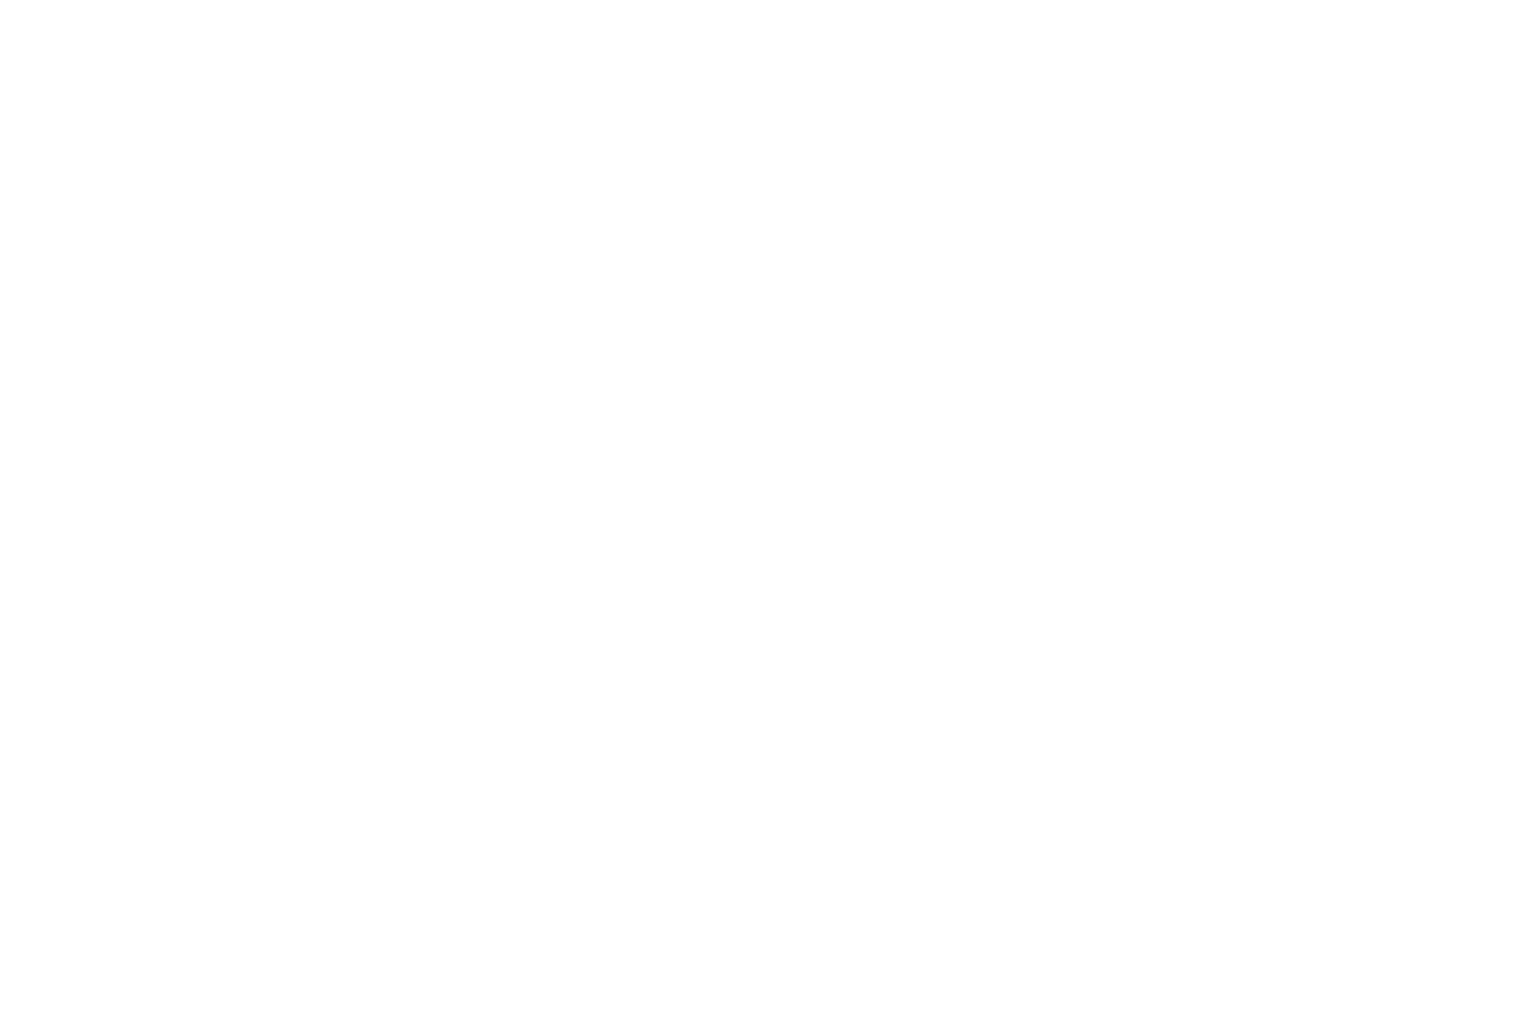

Empty DataFrame
Columns: [degree, betweenness]
Index: []


In [ ]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def download_gutenberg_book(book_id):
    # ... (código para descargar el libro, como en el ejemplo anterior)
    pass  # Placeholder for the download function

def process_with_stanza(cleaned_text, book_title="Moby Dick"):
    # ... (código para procesar el texto y crear el grafo, como en el ejemplo anterior)
    # Assuming you have the graph creation logic from previous examples
    G = nx.Graph()  # Replace with your actual graph creation code

    # Asignar colores a los nodos según su POS
    pos_colors = {'NOUN': 'blue', 'VERB': 'red', 'ADJ': 'green', 'ADV': 'purple'}
    node_colors = [pos_colors.get(nx.get_node_attributes(G, 'pos')[n], 'gray') for n in G.nodes]

    # Variar el tamaño de los nodos según su grado
    node_sizes = [d for n, d in G.degree()]

    # Calcular la frecuencia de cada tipo de relación y asignar el grosor de las aristas
    edge_labels = nx.get_edge_attributes(G, 'label')
    edge_counts = pd.Series(edge_labels).value_counts()
    edge_colors = [edge_counts[label] for label in edge_labels.values()]

    # Crear la visualización
    plt.figure(figsize=(15, 10))
    pos = nx.spring_layout(G, k=0.15)
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_size=8)
    plt.show()

    # Calcular métricas de centralidad
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)

    # Crear un DataFrame con las métricas
    centrality_df = pd.DataFrame({'degree': degree_centrality, 'betweenness': betweenness_centrality})

    return G, centrality_df

# Ejemplo de uso:
book_id = 1342
# Replace with your actual download and cleaning function:
# cleaned_text = download_and_clean_gutenberg_book(book_id)

graph, centrality_df = process_with_stanza(cleaned_text)

# Guardar el grafo en formato GraphML
nx.write_graphml(graph, "dependency_graph.graphml")

# Analizar las métricas de centralidad
print(centrality_df.head())

51-

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

52-

In [ ]:
import stanza
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# ... (código para descargar Moby Dick)

# Stanza
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')
doc = nlp(cleaned_text)

# NLTK
words = word_tokenize(cleaned_text)
pos_tags = pos_tag(words)
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word, _ in pos_tags]

# Comparación (ejemplo: precisión de las etiquetas POS)
# ... (código para calcular la precisión comparando las etiquetas POS de Stanz

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


53-

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will 

Precisión de las etiquetas POS de Stanza: 0.0


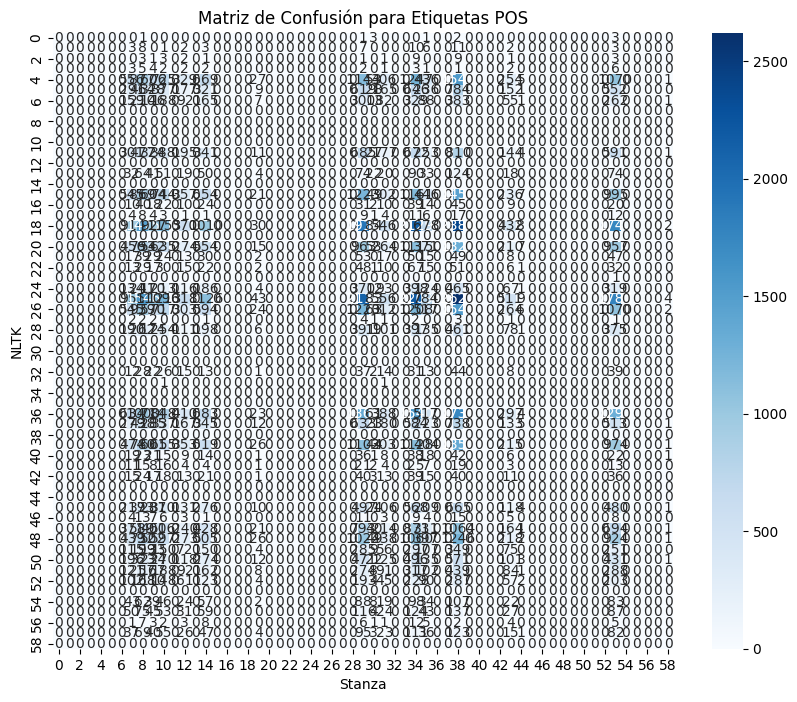

In [ ]:
import stanza
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (código para descargar Moby Dick y procesar con Stanza y NLTK)
# Assuming 'text' contains the downloaded content of Moby Dick

# Stanza processing
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma')
doc = nlp(text)
stanza_pos_tags = [word.upos for sent in doc.sentences for word in sent.words]

# NLTK processing
words = word_tokenize(text)
pos_tags = pos_tag(words)
nltk_pos_tags = [tag for word, tag in pos_tags]

# Ensure both lists have the same length by truncating the longer one to match the shorter one
min_len = min(len(stanza_pos_tags), len(nltk_pos_tags))
stanza_pos_tags = stanza_pos_tags[:min_len]
nltk_pos_tags = nltk_pos_tags[:min_len]

# Now create the confusion matrix
confusion_mat = confusion_matrix(nltk_pos_tags, stanza_pos_tags)

# Calculate the accuracy
accuracy = (confusion_mat.trace() / confusion_mat.sum()).round(2)
print(f"Precisión de las etiquetas POS de Stanza: {accuracy}")

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Stanza')
plt.ylabel('NLTK')
plt.title('Matriz de Confusión para Etiquetas POS')
plt.show()